<a href="https://colab.research.google.com/github/7001362464/bubu.github.io/blob/master/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours.
● This is a simple linear regression task as it involves just 2 variables.
● You can use R, Python, SAS Enterprise Miner or any other tool
● Data can be found at http://bit.ly/w-data
● What will be predicted score if a student studies for 9.25 hrs/ day?

#Imports
** Import pandas, numpy, matplotlib,and seaborn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Get the Data**
We'll work with the student_score csv file. It has numerical columns info, such as study hours and percentage obtained.

In [ ]:
student_info = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

will Check the head of student_info, and will check out its info() and describe() methods.

In [ ]:
student_info.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
student_info.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Exploratory Data Analysis
Let me explore the data!

For the rest of the exercise we'll only be using the numerical data of the csv file.

**I am using seaborn to create a jointplot to compare Hours and Score columns. Does the correlation make sense?**

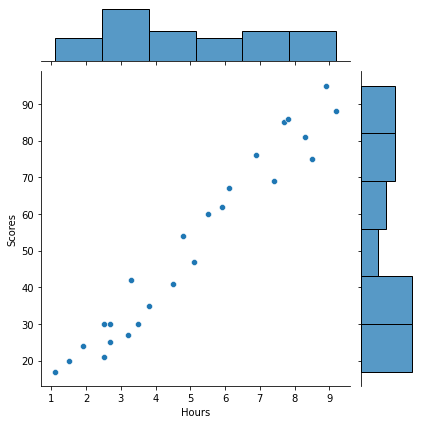

In [ ]:
## More time is given on study, more score has been earned.
sns.jointplot(x='Hours',y='Scores',data=student_info)

In [ ]:
student_info[['Hours','Scores']].corr()
#so scores and hours are nearly corelated as it tens to 1.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**same with  2D hex bin plot **

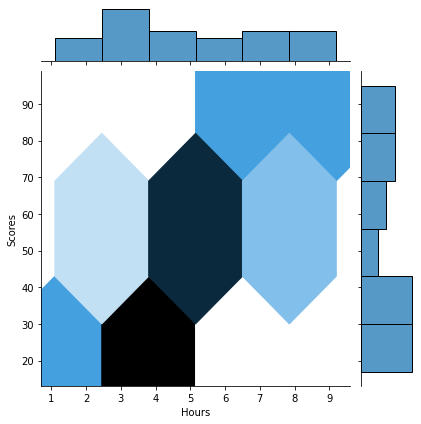

In [ ]:
#from this we understand around 2.4 to 5.2 hours student is more interms of no of student
sns.jointplot(x='Hours',y='Scores',kind='hex',data=student_info)

**Create a linear model plot (using seaborn's lmplot)**

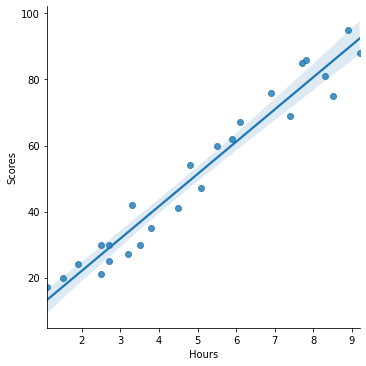

In [ ]:
sns.lmplot(x='Hours',y='Scores',data=student_info)

#Training and Testing Data
Now that we've explored the data a bit, let me go ahead and split the data into training and testing sets. ** Set a variable X equal to "Hours" of the student_info and a variable y equal to the "Scores" column. **

In [ ]:
y = student_info['Scores']

In [ ]:
X = student_info['Hours']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)


#Training the Model
Now its time to train our model on our training data!



In [ ]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named lm.

In [ ]:

lm = LinearRegression()

** Train/fit lm on the training data.**

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [ ]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[9.62519246]]


#Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [ ]:
predictions = lm.predict( X_test)

** will Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

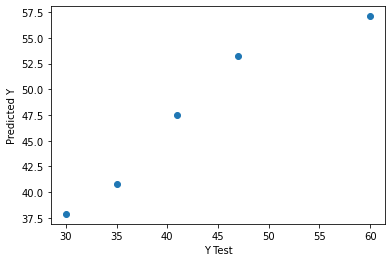

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).



In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score:', r2_score(y_test, predictions)*100,"%")
#we know if r2 score->1 then best accuracy we can get here r2 score is 0.95 means 95.76% it indicate this model is quite good enough.

RMSE: 4.717611824222121
r2_score: 95.76028359108649 %


Ploting a histogram of the residuals and make sure it looks normally distributed. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


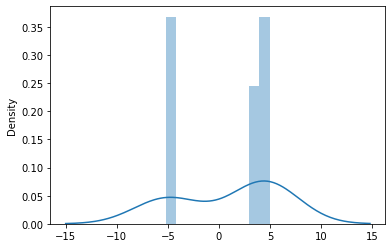

In [ ]:
sns.distplot((y_test-predictions),bins=10);
#it is not normal distribution it is negetive skew

#Model Deployment
Let see what will be our solution of a question by our model

What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
study_hour=pd.DataFrame(data={9.25},columns=['Hours'])
student_score=lm.predict(study_hour)

In [ ]:
student_score

array([[93.35096693]])

#Result

If a student study 9.25 hour as per our prediction by model he would get marks 93.35%